# Analysis for forecasting of no of patient visits to Manochaitanya 

## Importing the Libraries

In [16]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import os
from datetime import datetime
import warnings
warnings.filterwarnings("ignore") # supress warnings

Change the follwoing code to correct directory

## Reading the Dataset

In [17]:
!pwd

'pwd' is not recognized as an internal or external command,
operable program or batch file.


In [18]:
os.getcwd()

'E:\\Lab Files\\Repos\\Time_Series'

In [19]:
data = pd.read_csv(r"PreparedMNCData.csv")

In [20]:
data.head()

,TotalVisitedPatients,MncVisiteDate,DistrictId,TalukaId,ReportingMonthyear
0,11,2017-04-04,1,103,2017-04-01
1,20,2017-04-07,1,104,2017-04-01
2,5,2017-04-11,1,105,2017-04-01
3,2,2017-04-18,1,101,2017-04-01
4,0,2017-04-25,1,102,2017-04-01


In [21]:
data['MncVisiteDate'] = pd.to_datetime(data['MncVisiteDate'],  errors='coerce', format='%Y-%m-%d')
data['ReportingMonthyear'] = pd.to_datetime(data['ReportingMonthyear'],  errors='coerce', format='%Y-%m-%d')
# ,format='%Y-%m-%d'

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12865 entries, 0 to 12864
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   TotalVisitedPatients  12865 non-null  int64         
 1   MncVisiteDate         12865 non-null  datetime64[ns]
 2   DistrictId            12865 non-null  int64         
 3   TalukaId              12865 non-null  int64         
 4   ReportingMonthyear    12865 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(3)
memory usage: 502.7 KB


In [23]:
pd.Timestamp.min

Timestamp('1677-09-21 00:12:43.145224193')

In [24]:
pd.Timestamp.max

Timestamp('2262-04-11 23:47:16.854775807')

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12865 entries, 0 to 12864
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   TotalVisitedPatients  12865 non-null  int64         
 1   MncVisiteDate         12865 non-null  datetime64[ns]
 2   DistrictId            12865 non-null  int64         
 3   TalukaId              12865 non-null  int64         
 4   ReportingMonthyear    12865 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(3)
memory usage: 502.7 KB


In [26]:
data.set_index(('MncVisiteDate'), inplace = True)

In [27]:
data.index

DatetimeIndex(['2017-04-04', '2017-04-07', '2017-04-11', '2017-04-18',
               '2017-04-25', '2017-04-18', '2017-04-21', '2017-04-04',
               '2017-05-02', '2017-05-05',
               ...
               '2021-03-21', '2021-03-21', '2020-12-20', '2021-01-21',
               '2021-02-21', '2021-03-21', '2020-12-20', '2021-01-21',
               '2021-02-21', '2021-03-21'],
              dtype='datetime64[ns]', name='MncVisiteDate', length=12865, freq=None)

In [28]:
data['TotalVisitedPatients'].isnull().sum()

0

In [29]:
data.TotalVisitedPatients.isna().any()

False

In [30]:
check_for_nan = data['TotalVisitedPatients'].isnull()
print (check_for_nan)

MncVisiteDate
2017-04-04    False
2017-04-07    False
2017-04-11    False
2017-04-18    False
2017-04-25    False
              ...  
2021-03-21    False
2020-12-20    False
2021-01-21    False
2021-02-21    False
2021-03-21    False
Name: TotalVisitedPatients, Length: 12865, dtype: bool


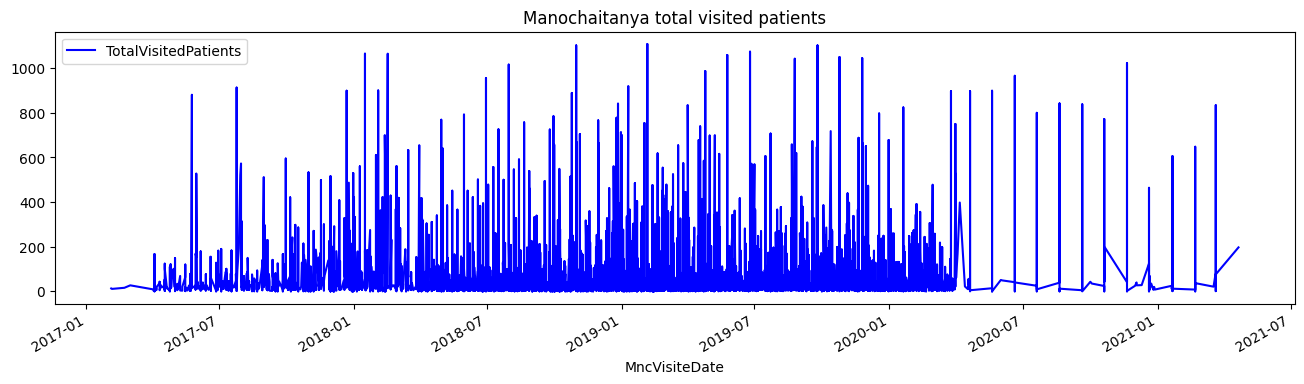

In [31]:
#mnc.plot(figsize=(12, 4))
data.plot(kind='line', y='TotalVisitedPatients',color='blue', figsize=(16, 4) )
plt.legend(loc='best')
plt.title('Manochaitanya total visited patients')
plt.show()

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12865 entries, 2017-04-04 to 2021-03-21
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   TotalVisitedPatients  12865 non-null  int64         
 1   DistrictId            12865 non-null  int64         
 2   TalukaId              12865 non-null  int64         
 3   ReportingMonthyear    12865 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(3)
memory usage: 502.5 KB


# Change District Number here...

In [33]:
#dist_1 = data[data['DistrictId']=='1']
dist_1 = data[data['DistrictId']==1]


In [34]:
#smallest10 = mnc_monthly.smallest(10, ['TotalVisitedPatients'])
# smallest10

In [35]:
data.head()

,TotalVisitedPatients,DistrictId,TalukaId,ReportingMonthyear
MncVisiteDate,,,,
2017-04-04,11,1,103,2017-04-01
2017-04-07,20,1,104,2017-04-01
2017-04-11,5,1,105,2017-04-01
2017-04-18,2,1,101,2017-04-01
2017-04-25,0,1,102,2017-04-01


In [36]:
# large10 = mnc_monthly.nlargest(10, ['TotalVisitedPatients'])
 #large10

In [37]:
dist_1.head()

,TotalVisitedPatients,DistrictId,TalukaId,ReportingMonthyear
MncVisiteDate,,,,
2017-04-04,11,1,103,2017-04-01
2017-04-07,20,1,104,2017-04-01
2017-04-11,5,1,105,2017-04-01
2017-04-18,2,1,101,2017-04-01
2017-04-25,0,1,102,2017-04-01


In [38]:
mnc_monthly = pd.DataFrame()

In [39]:
mnc_monthly = dist_1

In [40]:
mnc_monthly.head()

,TotalVisitedPatients,DistrictId,TalukaId,ReportingMonthyear
MncVisiteDate,,,,
2017-04-04,11,1,103,2017-04-01
2017-04-07,20,1,104,2017-04-01
2017-04-11,5,1,105,2017-04-01
2017-04-18,2,1,101,2017-04-01
2017-04-25,0,1,102,2017-04-01


In [41]:
mnc_monthly.describe()

,TotalVisitedPatients,DistrictId,TalukaId
count,334.000000,334.0,334.000000
mean,35.619760,1.0,103.368263
std,30.966838,0.0,1.432887
min,0.000000,1.0,101.000000
25%,10.000000,1.0,102.000000
50%,27.000000,1.0,104.000000
75%,55.750000,1.0,105.000000
max,149.000000,1.0,106.000000



## Outlier warning module
Percentile : The percent of population which lies below that value

Quantile : The cut points dividing the range of probability distribution into continuous intervals with equal probability. There are q-1 of q quantiles one of each k satisfying 0 < k < q

Quartile : Quartile is a special case of quantile, quartiles cut the data set into four equal parts i.e. q=4 for quantiles so we have First quartile Q1, second quartile Q2(Median) and third quartile Q3


Quartile
First quartile 	The first quartile is determined by No of elements ×(1/4). It is  the rank in the population (from least to greatest values) at which approximately 1/4 of the values are less than the value of the first quartile.  

In [42]:
Q0 = mnc_monthly.TotalVisitedPatients.quantile(0)
Q1 = mnc_monthly.TotalVisitedPatients.quantile(0.25)
Q3 = mnc_monthly.TotalVisitedPatients.quantile(0.75)
IQR = Q3 - Q1
print(IQR)
print(Q0)
print(Q1)
print(Q3)

45.75
0.0
10.0
55.75


In [43]:
min_value = Q0
print(min_value)

0.0


In [44]:
max_value = Q3 + 1.5 * IQR
print(max_value)

124.375


In [45]:
# value = 5000
value ={}

In [46]:

if value == 0:
 print('Entering a zero value, confirm if zero is ok')
elif not bool(value):
   # Check if this field is empty
   print('This field can not be empty, please enter a value')
elif (value < min_value):
   print ("The number of patients visited is less than the least number of patients visited in the past. Please confirm")
elif (value > max_value):
   print ("The number of patients is much higher than the number of patients visited in the past. Please confirm")




This field can not be empty, please enter a value


In [47]:
mnc_monthly.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 334 entries, 2017-04-04 to 2021-03-21
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   TotalVisitedPatients  334 non-null    int64         
 1   DistrictId            334 non-null    int64         
 2   TalukaId              334 non-null    int64         
 3   ReportingMonthyear    334 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(3)
memory usage: 13.0 KB


In [48]:
mnc_monthly.drop(['DistrictId', 'DistrictId','ReportingMonthyear', 'TalukaId'],axis = 1, inplace = True)

In [49]:
mnc_monthly.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 334 entries, 2017-04-04 to 2021-03-21
Data columns (total 1 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   TotalVisitedPatients  334 non-null    int64
dtypes: int64(1)
memory usage: 5.2 KB


In [50]:
mnc_monthly

,TotalVisitedPatients
MncVisiteDate,
2017-04-04,11
2017-04-07,20
2017-04-11,5
2017-04-18,2
2017-04-25,0
...,...
2021-03-21,81
2021-03-21,14
2021-03-21,71


In [51]:
mnc_monthly['TotalVisitedPatients'].isnull().sum()

0

In [52]:
mnc_monthly.TotalVisitedPatients.isna().any()

False

In [53]:
check_for_nan = mnc_monthly['TotalVisitedPatients'].isnull()
print (check_for_nan)

MncVisiteDate
2017-04-04    False
2017-04-07    False
2017-04-11    False
2017-04-18    False
2017-04-25    False
              ...  
2021-03-21    False
2021-03-21    False
2021-03-21    False
2021-03-21    False
2021-03-21    False
Name: TotalVisitedPatients, Length: 334, dtype: bool


In [54]:
mnc_monthly.index = dist_1.index

In [55]:
mnc_monthly.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 334 entries, 2017-04-04 to 2021-03-21
Data columns (total 1 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   TotalVisitedPatients  334 non-null    int64
dtypes: int64(1)
memory usage: 5.2 KB


In [56]:
mnc_monthly.index

DatetimeIndex(['2017-04-04', '2017-04-07', '2017-04-11', '2017-04-18',
               '2017-04-25', '2017-05-02', '2017-05-05', '2017-05-09',
               '2017-05-16', '2017-05-23',
               ...
               '2021-03-21', '2021-03-21', '2021-03-21', '2021-03-21',
               '2021-03-21', '2021-03-21', '2021-03-21', '2021-03-21',
               '2021-03-21', '2021-03-21'],
              dtype='datetime64[ns]', name='MncVisiteDate', length=334, freq=None)

Converting to monthly data

In [57]:
mnc_monthly = mnc_monthly.resample('M').sum()

In [58]:
mnc_monthly.head(20)

,TotalVisitedPatients
MncVisiteDate,
2017-04-30,38
2017-05-31,60
2017-06-30,124
2017-07-31,77
2017-08-31,84
2017-09-30,92
2017-10-31,129
2017-11-30,137
2017-12-31,157


In [59]:
large10 = mnc_monthly.nlargest(10, ['TotalVisitedPatients'])
large10

,TotalVisitedPatients
MncVisiteDate,
2021-03-31,908
2021-02-28,722
2020-02-29,494
2020-11-30,373
2019-11-30,365
2018-08-31,363
2018-09-30,352
2018-07-31,345
2018-06-30,335


In [60]:
mnc_monthly.describe()

,TotalVisitedPatients
count,48.000000
mean,247.854167
std,161.236576
min,0.000000
25%,150.500000
50%,242.000000
75%,311.000000
max,908.000000


In [61]:
smallest20 = mnc_monthly.nsmallest(20, ['TotalVisitedPatients'])
smallest20

,TotalVisitedPatients
MncVisiteDate,
2020-04-30,0
2020-05-31,0
2017-04-30,38
2017-05-31,60
2017-07-31,77
2017-08-31,84
2017-09-30,92
2020-09-30,120
2017-06-30,124


There are no MNCvisits for District 1 for the months of 2017 mar, 2017 may and 2020 MArch. So lets interpolate

In [62]:
# mnc_monthly.drop(mnc_monthly.loc[mnc_monthly['TotalVisitedPatients']==197].index, inplace=True)
# The data for April 2021 is not complete, hence deleting that value

In [63]:
print(mnc_monthly)

               TotalVisitedPatients
MncVisiteDate                      
2017-04-30                       38
2017-05-31                       60
2017-06-30                      124
2017-07-31                       77
2017-08-31                       84
2017-09-30                       92
2017-10-31                      129
2017-11-30                      137
2017-12-31                      157
2018-01-31                      281
2018-02-28                      186
2018-03-31                      154
2018-04-30                      180
2018-05-31                      228
2018-06-30                      335
2018-07-31                      345
2018-08-31                      363
2018-09-30                      352
2018-10-31                      301
2018-11-30                      283
2018-12-31                      233
2019-01-31                      227
2019-02-28                      160
2019-03-31                      304
2019-04-30                      223
2019-05-31                  

In [64]:
mnc_monthly.describe()

,TotalVisitedPatients
count,48.000000
mean,247.854167
std,161.236576
min,0.000000
25%,150.500000
50%,242.000000
75%,311.000000
max,908.000000


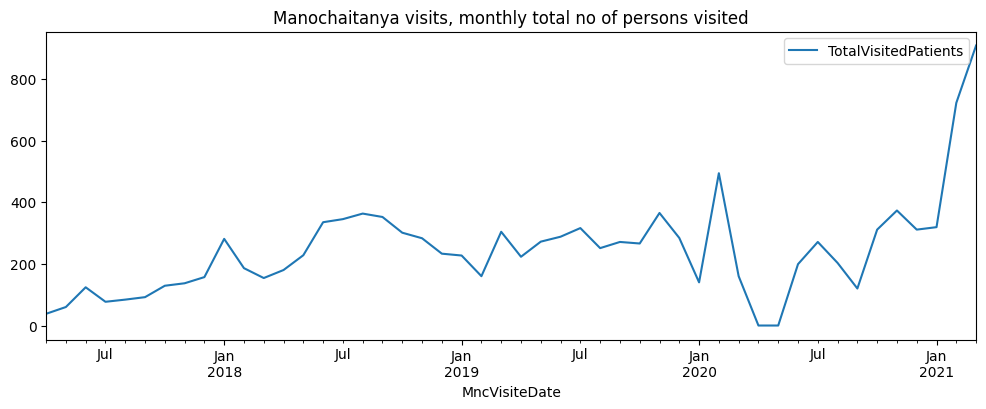

In [65]:
mnc_monthly.plot(figsize=(12, 4))
plt.legend(loc='best')
plt.title('Manochaitanya visits, monthly total no of persons visited')
plt.show()

In [66]:
mnc_monthly['TotalVisitedPatients'].isnull().sum()


0

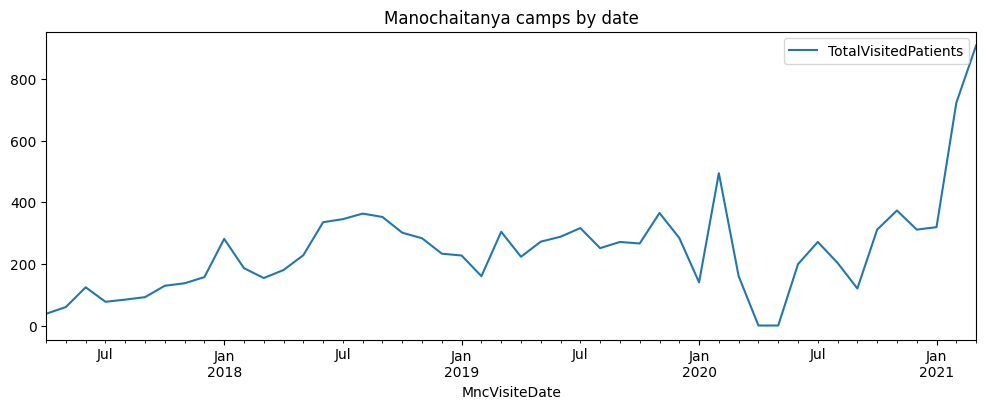

In [67]:
mnc_monthly.plot(figsize=(12, 4))
plt.legend(loc='best')
plt.title('Manochaitanya camps by date')
plt.show()

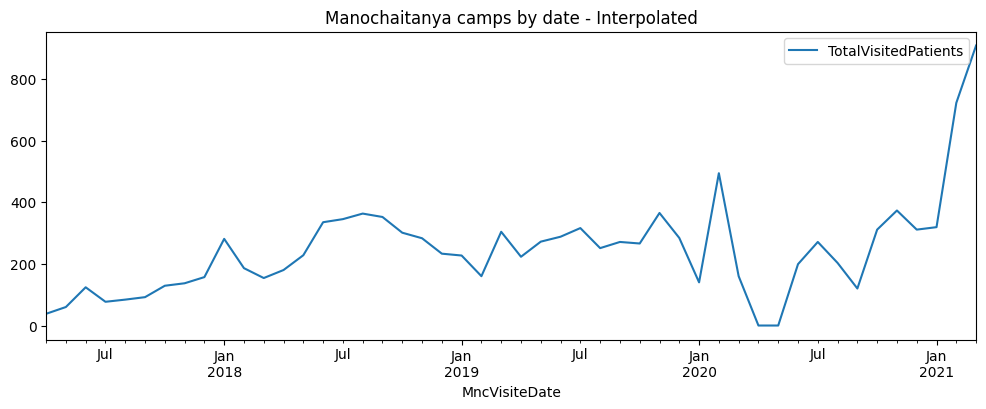

In [68]:
mnc_monthly.plot(figsize=(12, 4))
plt.legend(loc='best')
plt.title('Manochaitanya camps by date - Interpolated')
plt.show()

In [69]:
#mnc_monthly = mnc_monthly.interpolate(method='linear')
mnc_monthly['TotalVisitedPatients'].replace(to_replace=0, method='ffill', inplace = True)
# Impute the values with the previous value

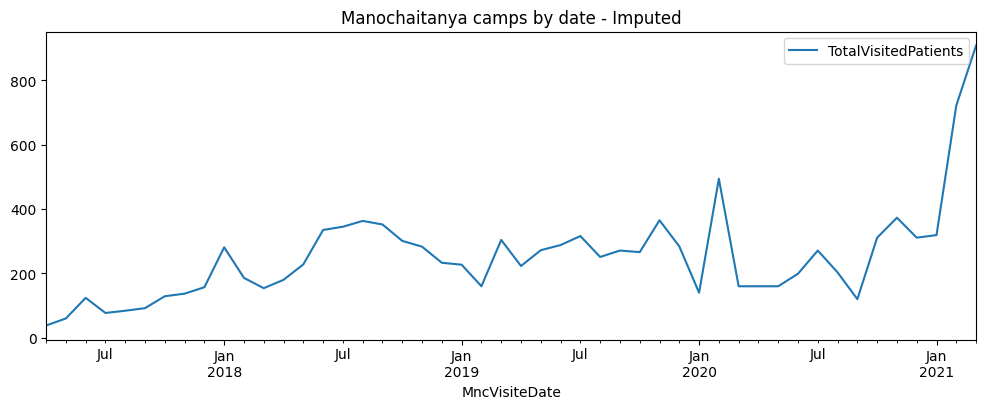

In [70]:
mnc_monthly.plot(figsize=(12, 4))
plt.legend(loc='best')
plt.title('Manochaitanya camps by date - Imputed')
plt.show()

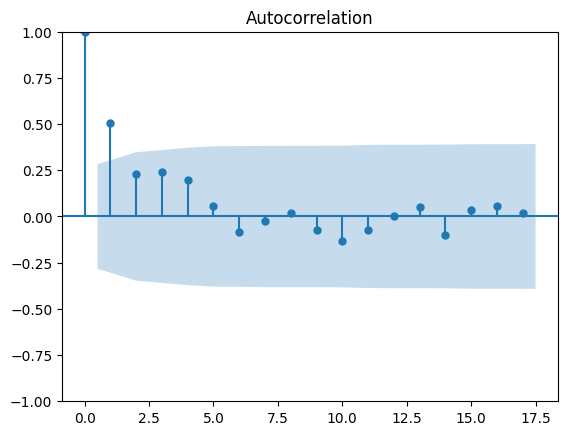

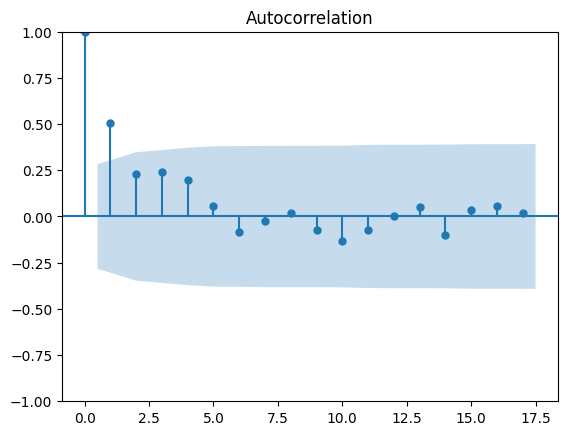

In [71]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(mnc_monthly)

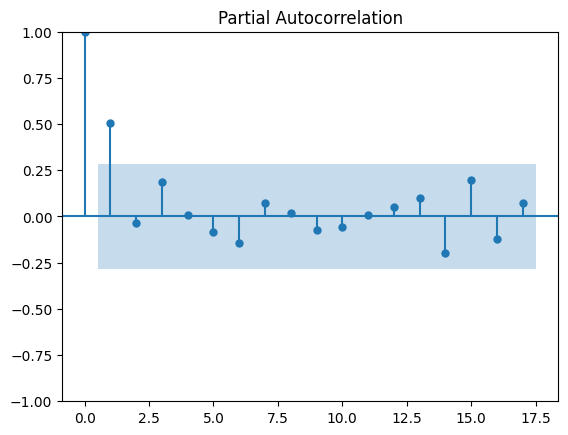

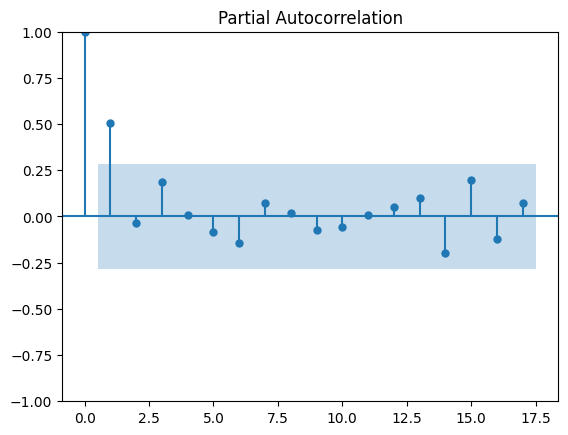

In [72]:
from statsmodels.graphics.tsaplots import plot_pacf

plot_pacf(mnc_monthly)

In [73]:
from statsmodels.tsa.seasonal import seasonal_decompose
# sd=seasonal_decompose(C,model='additive', period=1)
sd=seasonal_decompose(mnc_monthly['TotalVisitedPatients'],model='additive', period=1)

In [74]:
sd

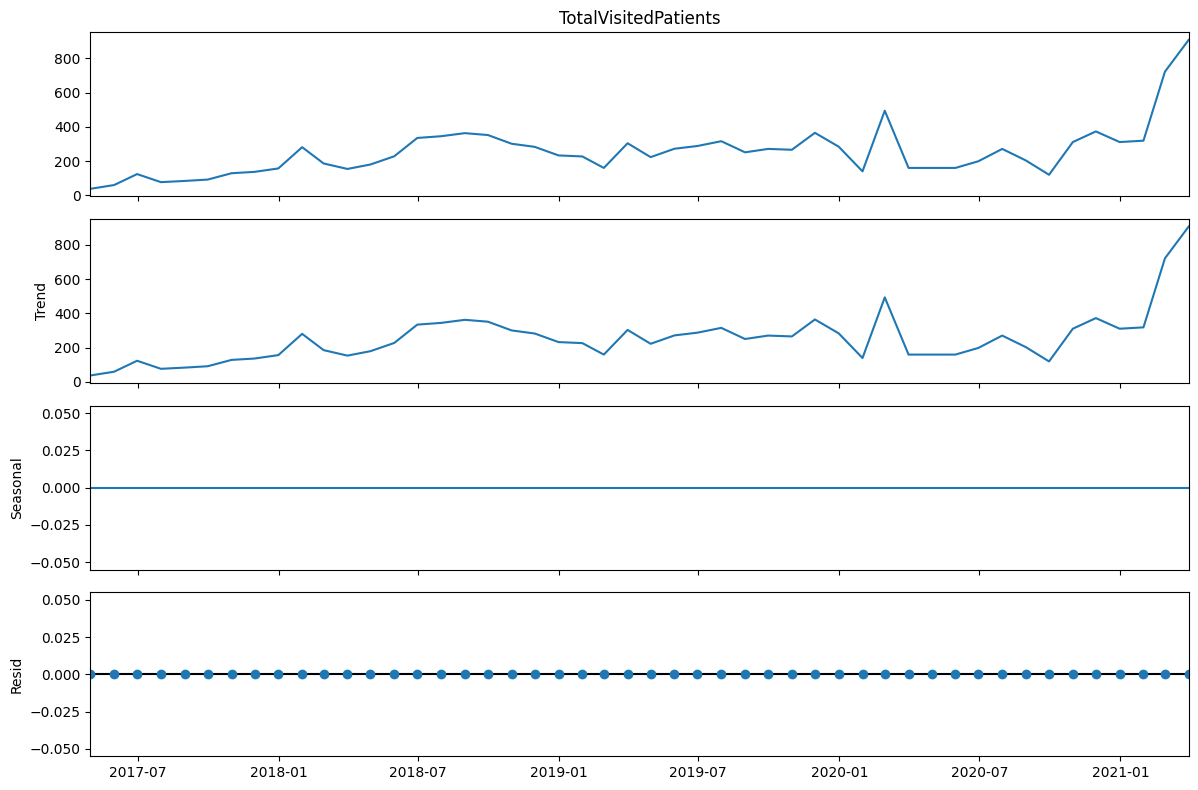

In [75]:
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8
from statsmodels.tsa.seasonal import seasonal_decompose

fig = sd.plot()
plt.show()# data_kar_weekly_interpolated['Date']

Time series of total patient visits to hospitals

Decomposing the time series: It can be observed that there is a trend but there is no seasonality. Forecasting for three months and training is total months - 6

In [62]:
total_months = len(mnc_monthly['TotalVisitedPatients'])
train_len = len(mnc_monthly['TotalVisitedPatients']) - 6
train = mnc_monthly[0:train_len]
#test = mnc_monthly[train_len:]
# oosf = mnc_monthly[: total_months-]
# Out of sample forecast(oosf)
oosf_months=3
oosf_end_month = total_months + oosf_months
mnc_monthly_mean = mnc_monthly['TotalVisitedPatients'].mean()

train_test = mnc_monthly[0:total_months]
train_test_len = len(mnc_monthly[0:total_months])
from datetime import timedelta
for i in range(total_months,oosf_end_month):
    idx = mnc_monthly.tail(1).index[0] + pd.DateOffset(months=1)
    mnc_monthly.loc[idx] = mnc_monthly_mean
    
test= mnc_monthly[train_len :total_months]
oosf = mnc_monthly[total_months :oosf_end_month ]

# oosf = mnc_monthly[total_months:oosf_months]

# Populate the OOSF months with default values of forecast
# Choose the last six months as test
mnc_monthly_mean
train_test

,TotalVisitedPatients
MncVisiteDate,
2017-04-30,38
2017-05-31,60
2017-06-30,124
2017-07-31,77
2017-08-31,84
2017-09-30,92
2017-10-31,129
2017-11-30,137
2017-12-31,157


In [63]:
total_months

48

In [64]:
train_test_len

48

In [65]:
len(oosf)

3

## Naive method

In [66]:
y_hat_naive = test.copy()
y_hat_oos_naive= oosf.copy()
y_hat_naive['naive_forecast'] = train['TotalVisitedPatients'][train_len-1] # The last val
y_hat_oos_naive['oos_naive_forecast'] = train_test['TotalVisitedPatients'][total_months-1]

In [67]:
y_hat_oos_naive

,TotalVisitedPatients,oos_naive_forecast
MncVisiteDate,,
2021-04-30,254.520833,908
2021-05-30,254.520833,908
2021-06-30,254.520833,908


### Plot train, test and forecast

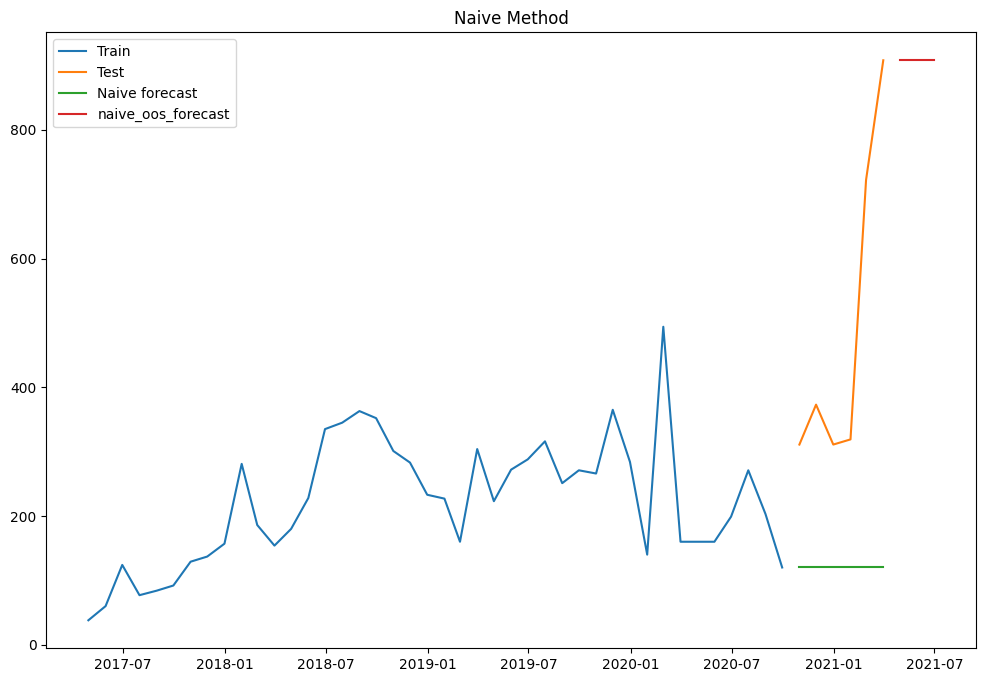

In [68]:


plt.plot(train['TotalVisitedPatients'], label='Train')
plt.plot(test['TotalVisitedPatients'], label='Test')
plt.plot(y_hat_naive['naive_forecast'], label='Naive forecast')
plt.plot(y_hat_oos_naive['oos_naive_forecast'],label='naive_oos_forecast')
plt.legend(loc='best')
plt.title('Naive Method')
plt.show()

### Calculate MAPE (Mean absolute percentage error)




\begin{equation}
\mathrm{MAPE}=100N×∑i=1N∣∣∣xi−x^ixi∣∣∣
\end{equation}


In [69]:
mape = np.round(np.mean(np.abs(test['TotalVisitedPatients']-y_hat_naive['naive_forecast'])/test['TotalVisitedPatients'])*100,2)
# take the absolute difference between the actual value and its forecast and divide by the actual value multiplied by 100 
# to get the percentage which is then rounded to two decimal places.
results = pd.DataFrame({'Method':['Naive method'], 'MAPE': [mape]})
results = results[['Method', 'MAPE']]
results

,Method,MAPE
0,Naive method,70.53


## Simple average

In [70]:
y_hat_avg = test.copy()
y_hat_avg['avg_forecast'] = train['TotalVisitedPatients'].mean()


In [71]:
y_hat_avg

,TotalVisitedPatients,avg_forecast
MncVisiteDate,,
2020-10-31,311.0,220.785714
2020-11-30,373.0,220.785714
2020-12-31,311.0,220.785714
2021-01-31,319.0,220.785714
2021-02-28,722.0,220.785714
2021-03-31,908.0,220.785714


In [72]:
y_hat_oos_avg= oosf.copy()
# y_hat_oos_avg['oos_avg_forecast'] = train_test['TotalVisitedPatients'].mean()
# y_hat_oos_avg=['oos_avg_forecast'] = train_test['TotalVisitedPatients'].mean()

In [73]:
y_hat_oos_avg['oos_avg_forecast'] = train_test['TotalVisitedPatients'].mean()


In [74]:
y_hat_oos_avg

,TotalVisitedPatients,oos_avg_forecast
MncVisiteDate,,
2021-04-30,254.520833,254.520833
2021-05-30,254.520833,254.520833
2021-06-30,254.520833,254.520833


In [75]:
y_hat_oos_avg

,TotalVisitedPatients,oos_avg_forecast
MncVisiteDate,,
2021-04-30,254.520833,254.520833
2021-05-30,254.520833,254.520833
2021-06-30,254.520833,254.520833


### Plot train, test and forecast


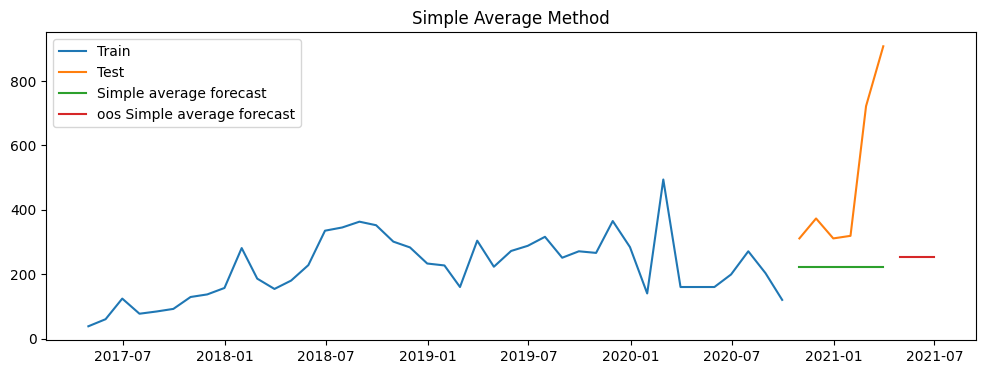

In [76]:
plt.figure(figsize=(12,4))
plt.plot(train['TotalVisitedPatients'], label='Train')
plt.plot(test['TotalVisitedPatients'], label='Test')
plt.plot(y_hat_avg['avg_forecast'], label='Simple average forecast')
plt.plot(y_hat_oos_avg['oos_avg_forecast'], label = 'oos Simple average forecast')
plt.legend(loc='best')
plt.title('Simple Average Method')
plt.show()

### Calculate MAPE

In [77]:
mape = np.round(np.mean(np.abs(test['TotalVisitedPatients']-y_hat_avg['avg_forecast'])/test['TotalVisitedPatients'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple average method'],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'MAPE']]
results

,Method,MAPE
0,Naive method,70.53
0,Simple average method,45.79


## Simple Moving Average

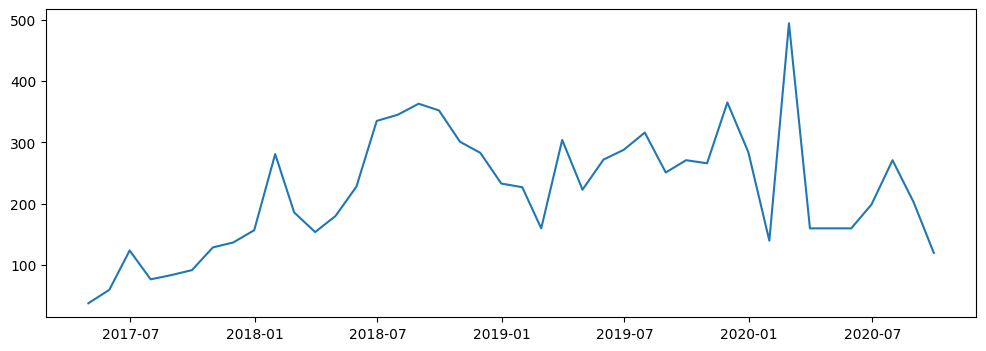

In [78]:
plt.figure(figsize=(12,4))
plt.plot(train['TotalVisitedPatients'], label='TotalVisitedPatients')

In [79]:
y_hat_sma = mnc_monthly.copy()
ma_window = 3
y_hat_sma['sma_forecast'] = mnc_monthly['TotalVisitedPatients'].rolling(ma_window).mean()
#y_hat_sma['oos_sma_forecast'] = mnc_monthly['TotalVisitedPatients'].rolling(ma_window).mean()
y_hat_sma['sma_forecast'][train_len:] = y_hat_sma['sma_forecast'][train_len-1]
#y_hat_sma['oos_sma_forecast'][total_months:] = y_hat_sma['sma_forecast'][train_len-1]

In [80]:
y_hat_sma['sma_forecast']

MncVisiteDate
2017-04-30           NaN
2017-05-31           NaN
2017-06-30     74.000000
2017-07-31     87.000000
2017-08-31     95.000000
2017-09-30     84.333333
2017-10-31    101.666667
2017-11-30    119.333333
2017-12-31    141.000000
2018-01-31    191.666667
2018-02-28    208.000000
2018-03-31    207.000000
2018-04-30    173.333333
2018-05-31    187.333333
2018-06-30    247.666667
2018-07-31    302.666667
2018-08-31    347.666667
2018-09-30    353.333333
2018-10-31    338.666667
2018-11-30    312.000000
2018-12-31    272.333333
2019-01-31    247.666667
2019-02-28    206.666667
2019-03-31    230.333333
2019-04-30    229.000000
2019-05-31    266.333333
2019-06-30    261.000000
2019-07-31    292.000000
2019-08-31    285.000000
2019-09-30    279.333333
2019-10-31    262.666667
2019-11-30    300.666667
2019-12-31    305.000000
2020-01-31    263.000000
2020-02-29    306.000000
2020-03-31    264.666667
2020-04-30    271.333333
2020-05-31    160.000000
2020-06-30    173.000000
2020-07-31 

In [81]:
y_hat_oos_sma = oosf.copy()


In [82]:
y_hat_oos_sma = oosf.copy()
ma_window = 3
y_hat_oos_sma['oos_sma_forecast'] = mnc_monthly['TotalVisitedPatients'].rolling(ma_window).mean()
#y_hat_oos_sma['oos_sma_forecast']  =  y_hat_oos_sma['oos_sma_forecast'][total_months -1]

In [83]:
y_hat_oos_sma['oos_sma_forecast']

MncVisiteDate
2021-04-30    628.173611
2021-05-30    472.347222
2021-06-30    254.520833
Name: oos_sma_forecast, dtype: float64

In [84]:
total_months

48

### Plot train, test and forecast

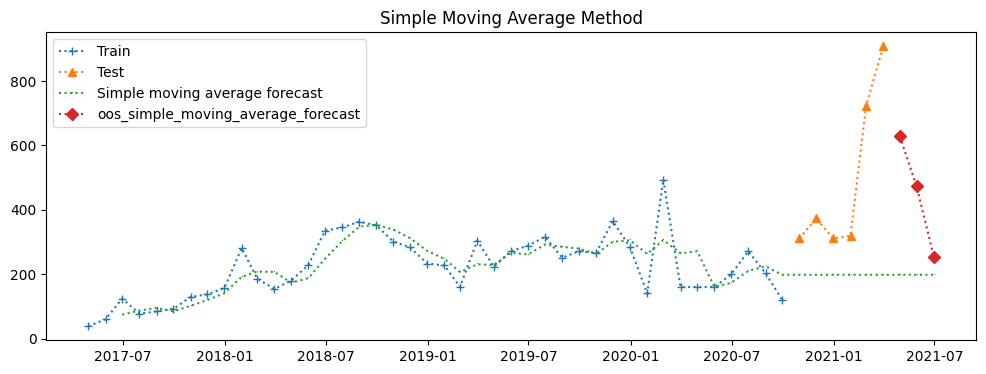

In [85]:
plt.figure(figsize=(12,4))
plt.plot(train['TotalVisitedPatients'], label='Train', marker ='+', linestyle = 'dotted')
plt.plot(test['TotalVisitedPatients'], label='Test', marker ='^', linestyle = 'dotted')
plt.plot(y_hat_sma['sma_forecast'], label='Simple moving average forecast', marker= ',', linestyle = 'dotted')
plt.plot(y_hat_oos_sma['oos_sma_forecast'],label='oos_simple_moving_average_forecast', marker = 'D', linestyle = 'dotted')
plt.plot(marker='o')
plt.legend(loc='best')
plt.title('Simple Moving Average Method')
plt.show()

### Calculate MAPE

In [86]:
mape = np.round(np.mean(np.abs(test['TotalVisitedPatients']-y_hat_sma['sma_forecast'][train_len:])/test['TotalVisitedPatients'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple moving average forecast'],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'MAPE']]
results

,Method,MAPE
0,Naive method,70.53
0,Simple average method,45.79
0,Simple moving average forecast,51.38


## Simple Exponential Smoothing Technique

The simplest of the exponentially smoothing methods is naturally called simple exponential smoothing (SES)13. This method is suitable for forecasting data with no clear trend or seasonal pattern. 


In [87]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

model = SimpleExpSmoothing(train['TotalVisitedPatients'])
model_fit = model.fit(smoothing_level=0.2, optimized=False) # alpha = 0.2 
print(model_fit.params)
y_hat_ses = test.copy()
y_hat_ses['ses_forecast'] = model_fit.forecast(len(test))


#y_hat_ses['ses_forecast'], ci = model_fit.predict((len(test)), return_conf_int=True,alpha=0.05)


# y_hat_ses['oos_ses_forecast']= model_fit.forecast(len(oosf +len(test)))
#out_of_sample_forecast = test.copy()
#out_of_sample_forecast['ses_forecast'] = model_fit.forecast(len(test+train)+10)
len(test)
#len(oosf)
y_hat_ses['ses_forecast']
# y_hat_ses['oos_ses_forecast']

{'smoothing_level': 0.2, 'smoothing_trend': None, 'smoothing_seasonal': None, 'damping_trend': nan, 'initial_level': 38.0, 'initial_trend': nan, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


MncVisiteDate
2020-10-31    207.393352
2020-11-30    207.393352
2020-12-31    207.393352
2021-01-31    207.393352
2021-02-28    207.393352
2021-03-31    207.393352
Name: ses_forecast, dtype: float64

In [88]:
# y_forec, conf_int  = model.predict(10,return_conf_int=True,alpha=0.05)

In [89]:
print(model_fit.params)

{'smoothing_level': 0.2, 'smoothing_trend': None, 'smoothing_seasonal': None, 'damping_trend': nan, 'initial_level': 38.0, 'initial_trend': nan, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [90]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
model_tt = SimpleExpSmoothing(train['TotalVisitedPatients'])
model_tt_fit = model_tt.fit(smoothing_level=0.2, optimized=False) # alpha = 0.2 
print(model_tt_fit.params)

{'smoothing_level': 0.2, 'smoothing_trend': None, 'smoothing_seasonal': None, 'damping_trend': nan, 'initial_level': 38.0, 'initial_trend': nan, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [91]:
# train_test['TotalVisitedPatients']

In [92]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

model_tt = SimpleExpSmoothing((train_test['TotalVisitedPatients']))
model_tt_fit = model_tt.fit(smoothing_level=.2, optimized=False) # alpha = 0.2 

# model_tt_fit = model_tt.fit(smoothing_level=.2,use_brute=True, optimized=False) # alpha = 0.2 
print(model_tt_fit.params)
y_hat_oos_ses = oosf.copy()
# y_hat_oos_ses['oos_ses_forecast'] = model_tt_fit.forecast(len(oosf))
# y_hat_ses['oos_ses_forecast']= model_fit.forecast(len(oosf +len(test)))
#out_of_sample_forecast = test.copy()
#out_of_sample_forecast['ses_forecast'] = model_fit.forecast(len(test+train)+10)
#len(test)
# oosf
#y_hat_ses['ses_forecast']
# y_hat_oos_ses['oos_ses_forecast']
# y_hat_oos_ses['oos_ses_forecast']

{'smoothing_level': 0.2, 'smoothing_trend': None, 'smoothing_seasonal': None, 'damping_trend': nan, 'initial_level': 38.0, 'initial_trend': nan, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [93]:
y_hat_oos_ses['oos_ses_forecast'] = model_tt_fit.predict((len(train_test) +1), (len(train_test) +oosf_months))

In [94]:
y_hat_oos_ses

,TotalVisitedPatients,oos_ses_forecast
MncVisiteDate,,
2021-04-30,254.520833,NaN
2021-05-30,254.520833,NaN
2021-06-30,254.520833,475.103179


In [95]:
# print((len(train_test)+oosf_months))

In [96]:
# forecast

In [97]:
print (y_hat_oos_ses['oos_ses_forecast'])

MncVisiteDate
2021-04-30           NaN
2021-05-30           NaN
2021-06-30    475.103179
Name: oos_ses_forecast, dtype: float64


In [98]:
# model_fit.predict(3)

In [99]:

# start_index = len(test+train)
# end_index = start_index + 2
# y_hat_oos_ses['oos_ses_forecast']  = model_fit.predict(start=start_index, end=end_index)

In [100]:
y_hat_oos_ses['oos_ses_forecast']

MncVisiteDate
2021-04-30           NaN
2021-05-30           NaN
2021-06-30    475.103179
Name: oos_ses_forecast, dtype: float64

In [101]:
# y_hat_oos_ses.fillna(method='bfill', inplace=True)

In [102]:
y_hat_oos_ses

,TotalVisitedPatients,oos_ses_forecast
MncVisiteDate,,
2021-04-30,254.520833,NaN
2021-05-30,254.520833,NaN
2021-06-30,254.520833,475.103179


# Predicting Confidence Interval

pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

In [103]:
# y_hat_ses['ses_forecast']

In [104]:
# out_of_sample_forecast['ses_forecast']


In [105]:
# ses_forecast = fitted.forecast(steps=12)


In [106]:
# fig = plt.figure()
# fig.suptitle('Simple exponential smoothing forecast')
# past, = plt.plot(train['TotalVisitedPatients'], label='Train')
# future, = plt.plot(test['TotalVisitedPatients'], label='Test')
# predicted_future, = plt.plot(forecast, label='Forecast')
# plt.legend(handles=[past, future, predicted_future])
 #plt.show()

In [107]:
# out_of_sample_forecast

# Out of sample forecast predictions

model = ARIMA(order = (p,d,q), seasonal_order=(P,D,Q,S))
model.fit(train_data)

train_predictions = model.predict_in_sample()
test_predictions = model.predict(n_periods=len(test_data.index))

predictions = pd.concatenate((train_predictions, test_predictions),axis=0)

### Plot train, test and forecast

In [108]:
# y_hat_oos_ses['oos_ses_forecast']


In [109]:
y_hat_oos_ses['oos_ses_forecast'] 

MncVisiteDate
2021-04-30           NaN
2021-05-30           NaN
2021-06-30    475.103179
Name: oos_ses_forecast, dtype: float64

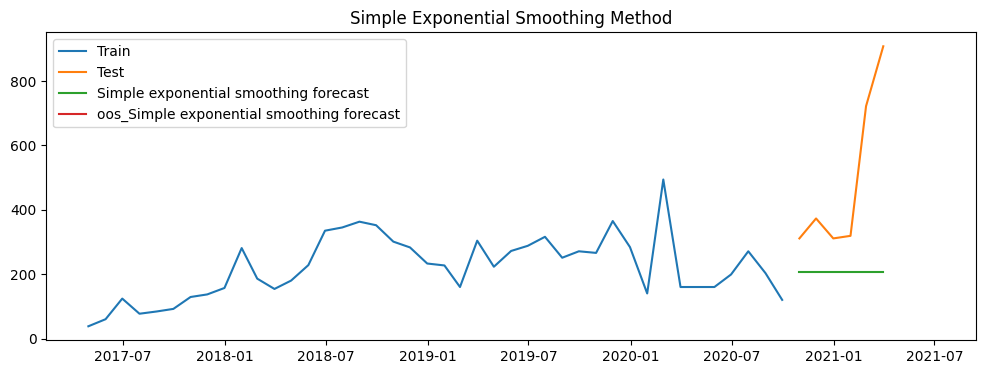

In [110]:
plt.figure(figsize=(12,4))
plt.plot(train['TotalVisitedPatients'], label='Train')
plt.plot(test['TotalVisitedPatients'], label='Test')
plt.plot(y_hat_ses['ses_forecast'], label='Simple exponential smoothing forecast')
plt.plot(y_hat_oos_ses['oos_ses_forecast'], label='oos_Simple exponential smoothing forecast')

# y_hat_ses['ses_forecast'] = model_fit.forecast(len(test))

# plt.plot(oos_test['TotalVisitedPatients'],label='oos_Simple exponential smoothing forecast')
plt.legend(loc='best')
plt.title('Simple Exponential Smoothing Method')
plt.show()

In [111]:
y_hat_oos_ses['oos_ses_forecast']

MncVisiteDate
2021-04-30           NaN
2021-05-30           NaN
2021-06-30    475.103179
Name: oos_ses_forecast, dtype: float64

### Calculate MAPE

In [112]:
mape = np.round(np.mean(np.abs(test['TotalVisitedPatients']-y_hat_ses['ses_forecast'])/test['TotalVisitedPatients'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple exponential smoothing forecast'],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results

,Method,MAPE
0,Naive method,70.53
0,Simple average method,45.79
0,Simple moving average forecast,51.38
0,Simple exponential smoothing forecast,49.07


## Holt Method


In [113]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

model = ExponentialSmoothing(np.asarray(train['TotalVisitedPatients']),seasonal_periods=12, trend='additive', seasonal=None)
#model_fit = model.fit(smoothing_level=0.2, smoothing_slope=0.04, optimized=False)
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_holt = test.copy()
y_hat_holt['holt_forecast'] = model_fit.forecast(len(test))
# y_hat_holt['holt_forecast'] = model_fit.get_forecast(len(test))

{'smoothing_level': 0.27438660632906553, 'smoothing_trend': 0.12909924375377288, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 36.363390997092715, 'initial_trend': 14.914224497625998, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [114]:

# Generate forecasts
y_hat_holt = test.copy()
y_hat_holt['holt_forecast'] = model_fit.forecast(len(test))

# If you want to manually compute confidence intervals, you could do something like this:
# Assuming the standard error of the forecast is available or can be estimated
forecast = y_hat_holt['holt_forecast']
stderr = np.std(model_fit.resid)  # Standard error of residuals

# Calculate 95% confidence intervals
z = 1.96  # for 95% confidence interval
ci_lower = forecast - z * stderr
ci_upper = forecast + z * stderr

y_hat_holt['ci_lower'] = ci_lower
y_hat_holt['ci_upper'] = ci_upper

print(y_hat_holt)

               TotalVisitedPatients  holt_forecast   ci_lower    ci_upper
MncVisiteDate                                                            
2020-10-31                    311.0     173.543374  20.400068  326.686680
2020-11-30                    373.0     164.741497  11.598191  317.884803
2020-12-31                    311.0     155.939621   2.796315  309.082927
2021-01-31                    319.0     147.137744  -6.005562  300.281050
2021-02-28                    722.0     138.335868 -14.807438  291.479174
2021-03-31                    908.0     129.533991 -23.609315  282.677297


In [115]:
y_hat_holt['holt_forecast']

MncVisiteDate
2020-10-31    173.543374
2020-11-30    164.741497
2020-12-31    155.939621
2021-01-31    147.137744
2021-02-28    138.335868
2021-03-31    129.533991
Name: holt_forecast, dtype: float64

In [116]:
# Out of sample forecasting
from statsmodels.tsa.holtwinters import ExponentialSmoothing

model = ExponentialSmoothing(np.asarray(train_test['TotalVisitedPatients']),seasonal_periods=12, trend='additive', seasonal=None)
#model_fit = model.fit(smoothing_level=0.2, smoothing_slope=0.04, optimized=False)
model_tt_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_oos_holt = oosf.copy()
#y_hat_holt['oos_holt_forecast'] = model_fit.forecast(len(test))
y_hat_oos_holt['oos_holt_forecast'] = model_tt_fit.predict(len(train_test) +1, (len(train_test) +oosf_months))

{'smoothing_level': 0.27438660632906553, 'smoothing_trend': 0.12909924375377288, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 36.363390997092715, 'initial_trend': 14.914224497625998, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [117]:
print(len(train_test)+ (oosf_months))

51


In [118]:
oosf_months

3

In [119]:
y_hat_oos_holt['oos_holt_forecast']

MncVisiteDate
2021-04-30    866.150351
2021-05-30    884.899387
2021-06-30    903.648422
Name: oos_holt_forecast, dtype: float64

In [120]:
# fig, ax = plt.subplots()
# ax.plot(x,y)
# ax.fill_between(x, (y-ci), (y+ci), color='b', alpha=.1)
ci = 100
upper_limit = y_hat_oos_holt['TotalVisitedPatients'] + ci
lower_imit  = y_hat_oos_holt['TotalVisitedPatients'] - ci

In [121]:
upper_limit

MncVisiteDate
2021-04-30    354.520833
2021-05-30    354.520833
2021-06-30    354.520833
Name: TotalVisitedPatients, dtype: float64

In [122]:
y_hat_oos_holt['upper_limit'] = y_hat_oos_holt['oos_holt_forecast'] + ci
y_hat_oos_holt['lower_imit'] = y_hat_oos_holt['oos_holt_forecast'] - ci

In [123]:
y_hat_oos_holt['oos_holt_forecast']

MncVisiteDate
2021-04-30    866.150351
2021-05-30    884.899387
2021-06-30    903.648422
Name: oos_holt_forecast, dtype: float64

In [124]:
y_hat_oos_holt['upper_limit']

MncVisiteDate
2021-04-30     966.150351
2021-05-30     984.899387
2021-06-30    1003.648422
Name: upper_limit, dtype: float64

In [125]:
y_hat_oos_holt

,TotalVisitedPatients,oos_holt_forecast,upper_limit,lower_imit
MncVisiteDate,,,,
2021-04-30,254.520833,866.150351,966.150351,766.150351
2021-05-30,254.520833,884.899387,984.899387,784.899387
2021-06-30,254.520833,903.648422,1003.648422,803.648422


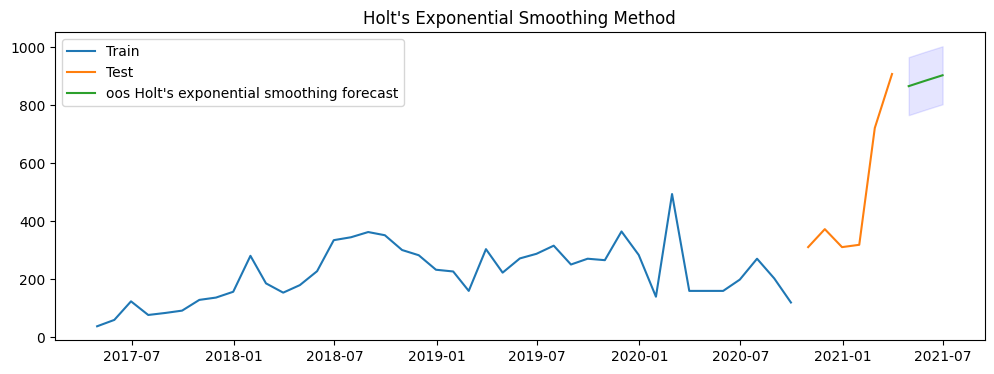

In [126]:
plt.figure(figsize=(12,4))
plt.plot(train['TotalVisitedPatients'], label='Train')
plt.plot(test['TotalVisitedPatients'], label='Test')
#plt.plot(y_hat_holt['holt_forecast'], label='Holt\'s exponential smoothing forecast')
plt.plot(y_hat_oos_holt['oos_holt_forecast'], label='oos Holt\'s exponential smoothing forecast')
plt.legend(loc='best')
plt.fill_between(y_hat_oos_holt.index, y_hat_oos_holt['upper_limit'], y_hat_oos_holt['lower_imit'], color='b', alpha=.1)
plt.title('Holt\'s Exponential Smoothing Method')
plt.show()



### Plot train, test and forecast

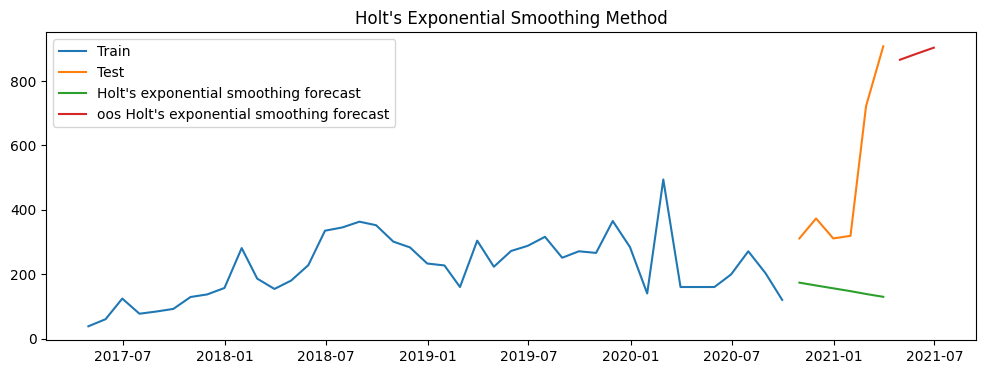

In [127]:
plt.figure(figsize=(12,4))
plt.plot(train['TotalVisitedPatients'], label='Train')
plt.plot(test['TotalVisitedPatients'], label='Test')
plt.plot(y_hat_holt['holt_forecast'], label='Holt\'s exponential smoothing forecast')
plt.plot(y_hat_oos_holt['oos_holt_forecast'], label='oos Holt\'s exponential smoothing forecast')
plt.legend(loc='best')
plt.title('Holt\'s Exponential Smoothing Method')
plt.show()

### Calculate MAPE

In [128]:
mape = np.round(np.mean(np.abs(test['TotalVisitedPatients']-y_hat_holt['holt_forecast'])/test['TotalVisitedPatients'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt\'s exponential smoothing method'], 'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'MAPE']]
results


,Method,MAPE
0,Naive method,70.53
0,Simple average method,45.79
0,Simple moving average forecast,51.38
0,Simple exponential smoothing forecast,49.07
0,Holt's exponential smoothing method,61.72


# Holt Winters' additive method


In [129]:
y_hat_hwa = test.copy()
model = ExponentialSmoothing(np.asarray(train['TotalVisitedPatients']) ,seasonal_periods=12 ,trend='add', seasonal='add')
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_hwa['hw_forecast'] = model_fit.forecast(len(test))

{'smoothing_level': 0.3202296203692219, 'smoothing_trend': 0.10552973848799635, 'smoothing_seasonal': 0.012613254518886436, 'damping_trend': nan, 'initial_level': 69.24419103918027, 'initial_trend': 10.104424230564423, 'initial_seasons': array([-56.80102033, -30.52890687,  24.32424633,  37.94634136,
         9.26597002,  -9.49376805,  -1.7808485 ,  27.82439595,
       -15.04324933, -33.45608846,  45.13946053, -44.80577302]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


### Plot train, test and forecast

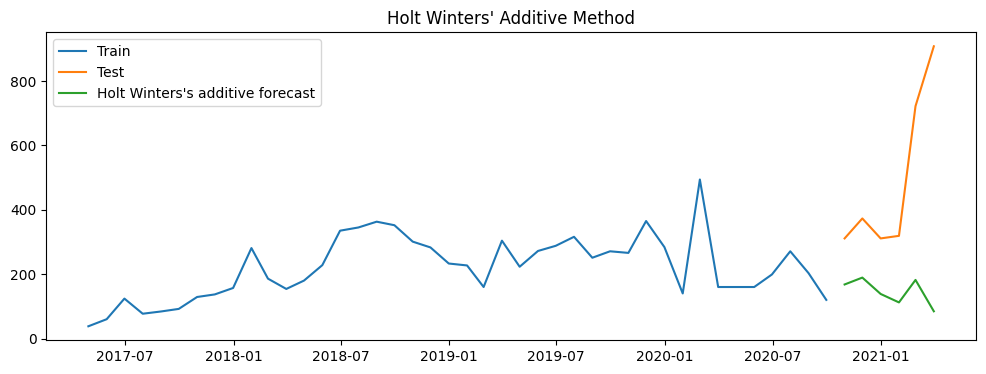

In [130]:
plt.figure(figsize=(12,4))
plt.plot( train['TotalVisitedPatients'], label='Train')
plt.plot(test['TotalVisitedPatients'], label='Test')
plt.plot(y_hat_hwa['hw_forecast'], label='Holt Winters\'s additive forecast')
plt.legend(loc='best')
plt.title('Holt Winters\' Additive Method')
plt.show()

### Calculate MAPE

In [131]:
mape = np.round(np.mean(np.abs(test['TotalVisitedPatients']-y_hat_hwa['hw_forecast'])/test['TotalVisitedPatients'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt Winters\' additive method'], 'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'MAPE']]
results

,Method,MAPE
0,Naive method,70.53
0,Simple average method,45.79
0,Simple moving average forecast,51.38
0,Simple exponential smoothing forecast,49.07
0,Holt's exponential smoothing method,61.72
0,Holt Winters' additive method,63.51


# Holt Winters' Multiplicative method

In [132]:
y_hat_hwm = test.copy()
model = ExponentialSmoothing(np.asarray(train['TotalVisitedPatients']) ,seasonal_periods=12 ,trend='add', seasonal='mul')
model_fit = model.fit(optimized=True)
print(model_fit.params)
print(model_fit.summary)
y_hat_hwm['hw_forecast'] = model_fit.forecast(len(test))

{'smoothing_level': 0.33317567565776296, 'smoothing_trend': 0.11220287797500712, 'smoothing_seasonal': 0.012056248349852158, 'damping_trend': nan, 'initial_level': 68.41819069665057, 'initial_trend': 6.381587682374354, 'initial_seasons': array([1.0437472 , 1.22896903, 1.52093042, 1.66618154, 1.50860454,
       1.44352548, 1.35741936, 1.48093526, 1.24288152, 1.15452865,
       1.56376578, 1.13055748]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}
<bound method HoltWintersResults.summary of <statsmodels.tsa.holtwinters.results.HoltWintersResults object at 0x0000028FDA175BD0>>


### Plot train, test and forecast

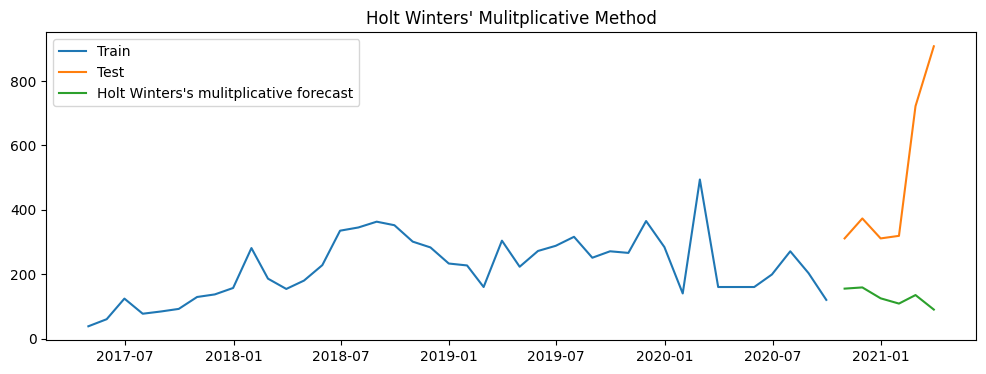

In [133]:
plt.figure(figsize=(12,4))
plt.plot( train['TotalVisitedPatients'], label='Train')
plt.plot(test['TotalVisitedPatients'], label='Test')
plt.plot(y_hat_hwm['hw_forecast'], label='Holt Winters\'s mulitplicative forecast')
plt.legend(loc='best')
plt.title('Holt Winters\' Mulitplicative Method')
plt.show()

### Calculate MAPE

In [134]:
mape = np.round(np.mean(np.abs(test['TotalVisitedPatients']-y_hat_hwm['hw_forecast'])/test['TotalVisitedPatients'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt Winters\' multiplicative method'], 'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'MAPE']]
results

,Method,MAPE
0,Naive method,70.53
0,Simple average method,45.79
0,Simple moving average forecast,51.38
0,Simple exponential smoothing forecast,49.07
0,Holt's exponential smoothing method,61.72
0,Holt Winters' additive method,63.51
0,Holt Winters' multiplicative method,67.48


# Regression Models


## Stationarity Test


In [135]:
# Stationarity test - KPSS test
from statsmodels.tsa.stattools import kpss
kpss_test = kpss(mnc_monthly['TotalVisitedPatients'])

print('KPSS Statistic: %f' % kpss_test[0])
print('Critical Values @ 0.05: %.2f' % kpss_test[3]['5%'])
print('p-value: %f' % kpss_test[1])

KPSS Statistic: 0.573778
Critical Values @ 0.05: 0.46
p-value: 0.025050


## Box Cox transformation to make variance constant

In [136]:
train.describe()

,TotalVisitedPatients
count,42.000000
mean,220.785714
std,98.074769
min,38.000000
25%,154.750000
50%,225.000000
75%,283.750000
max,494.000000


In [137]:
test.describe()

,TotalVisitedPatients
count,6.000000
mean,490.666667
std,259.058809
min,311.000000
25%,313.000000
50%,346.000000
75%,634.750000
max,908.000000


In [138]:
oosf.describe()

,TotalVisitedPatients
count,3.000000
mean,254.520833
std,0.000000
min,254.520833
25%,254.520833
50%,254.520833
75%,254.520833
max,254.520833


In [139]:
mnc_monthly.describe()

,TotalVisitedPatients
count,51.000000
mean,254.520833
std,149.151599
min,38.000000
25%,160.000000
50%,254.520833
75%,307.500000
max,908.000000


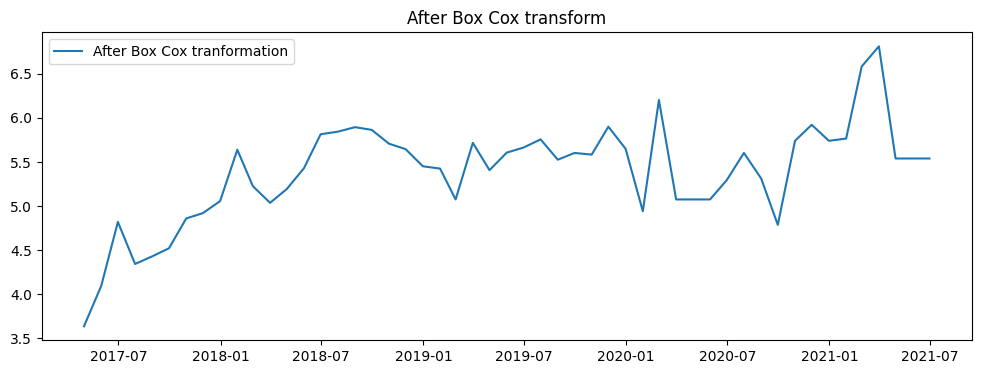

In [140]:
from scipy.stats import boxcox
data_boxcox = pd.Series(boxcox(mnc_monthly['TotalVisitedPatients'], lmbda=0), index = mnc_monthly.index) # lmbda=0 implies log transformation

plt.figure(figsize=(12,4))
plt.plot(data_boxcox, label='After Box Cox tranformation')
plt.legend(loc='best')
plt.title('After Box Cox transform')
plt.show()

In [141]:
data_boxcox

MncVisiteDate
2017-04-30    3.637586
2017-05-31    4.094345
2017-06-30    4.820282
2017-07-31    4.343805
2017-08-31    4.430817
2017-09-30    4.521789
2017-10-31    4.859812
2017-11-30    4.919981
2017-12-31    5.056246
2018-01-31    5.638355
2018-02-28    5.225747
2018-03-31    5.036953
2018-04-30    5.192957
2018-05-31    5.429346
2018-06-30    5.814131
2018-07-31    5.843544
2018-08-31    5.894403
2018-09-30    5.863631
2018-10-31    5.707110
2018-11-30    5.645447
2018-12-31    5.451038
2019-01-31    5.424950
2019-02-28    5.075174
2019-03-31    5.717028
2019-04-30    5.407172
2019-05-31    5.605802
2019-06-30    5.662960
2019-07-31    5.755742
2019-08-31    5.525453
2019-09-30    5.602119
2019-10-31    5.583496
2019-11-30    5.899897
2019-12-31    5.648974
2020-01-31    4.941642
2020-02-29    6.202536
2020-03-31    5.075174
2020-04-30    5.075174
2020-05-31    5.075174
2020-06-30    5.293305
2020-07-31    5.602119
2020-08-31    5.313206
2020-09-30    4.787492
2020-10-31    5.7397

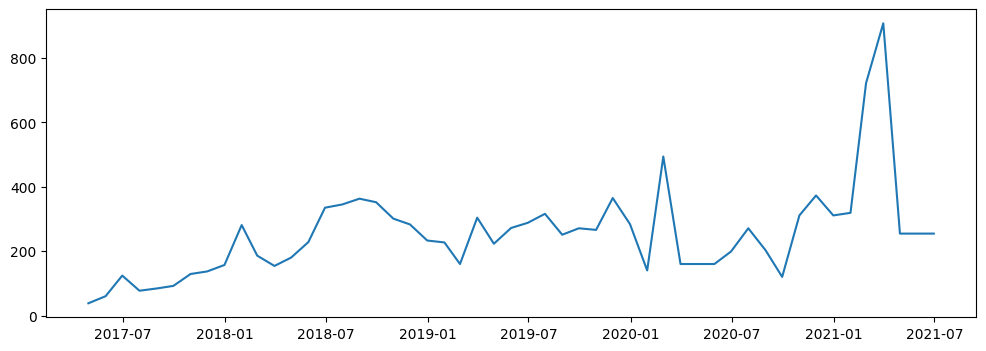

In [142]:
plt.figure(figsize=(12,4))
plt.plot( mnc_monthly['TotalVisitedPatients'], label='TotalVisitedPatients')

In [143]:

#!pip install pmdarima


In [144]:
from statsmodels.tsa.arima_model import ARIMA

import pmdarima as pm

model = pm.auto_arima(mnc_monthly['TotalVisitedPatients'], start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.31 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=643.698, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=643.085, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=637.286, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=641.742, Time=0.00 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.11 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.19 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=636.145, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=634.121, Time=0.10 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=641.153, Time=0.04 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=635.398, Time=0.15 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=635.117, Time=0.10 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=633.119, Time=0.04 sec
 ARIMA(0,1,3)(0,0,0)[0]             : AIC=635.117, Time=0.07 sec
 ARIMA(1,1,3)(0,0,0)[0]             : AIC=637.064, Time=0.1

In [145]:
mnc_len = mnc_monthly['TotalVisitedPatients']

In [146]:
mnc_len

MncVisiteDate
2017-04-30     38.000000
2017-05-31     60.000000
2017-06-30    124.000000
2017-07-31     77.000000
2017-08-31     84.000000
2017-09-30     92.000000
2017-10-31    129.000000
2017-11-30    137.000000
2017-12-31    157.000000
2018-01-31    281.000000
2018-02-28    186.000000
2018-03-31    154.000000
2018-04-30    180.000000
2018-05-31    228.000000
2018-06-30    335.000000
2018-07-31    345.000000
2018-08-31    363.000000
2018-09-30    352.000000
2018-10-31    301.000000
2018-11-30    283.000000
2018-12-31    233.000000
2019-01-31    227.000000
2019-02-28    160.000000
2019-03-31    304.000000
2019-04-30    223.000000
2019-05-31    272.000000
2019-06-30    288.000000
2019-07-31    316.000000
2019-08-31    251.000000
2019-09-30    271.000000
2019-10-31    266.000000
2019-11-30    365.000000
2019-12-31    284.000000
2020-01-31    140.000000
2020-02-29    494.000000
2020-03-31    160.000000
2020-04-30    160.000000
2020-05-31    160.000000
2020-06-30    199.000000
2020-07-31 

C:\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


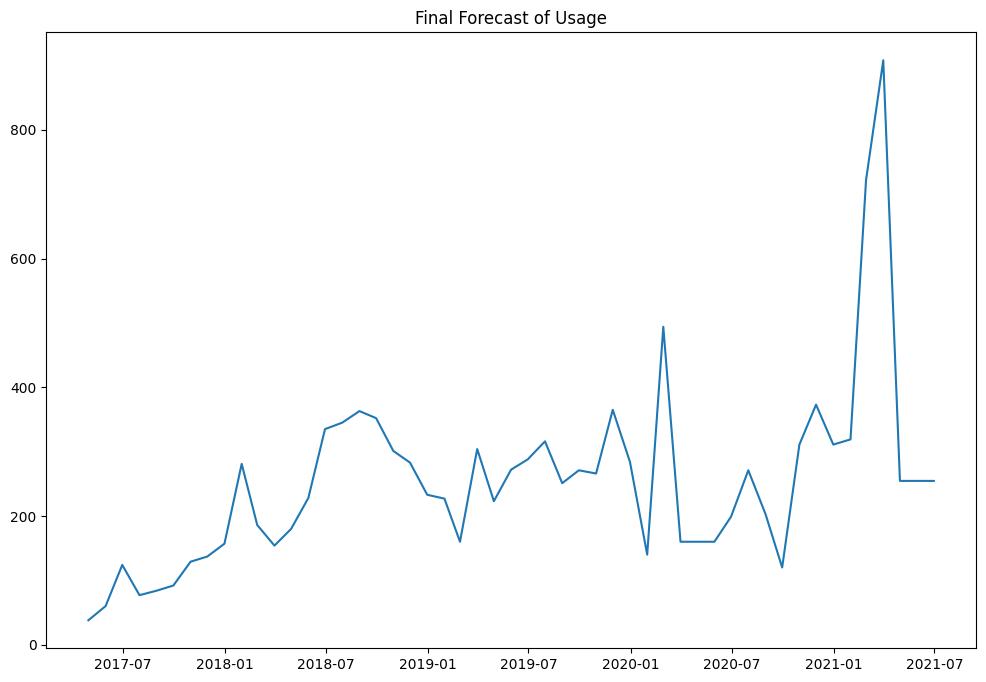

In [147]:


# Forecast
n_periods = 3
fc, confint = model.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = np.arange(len(mnc_monthly['TotalVisitedPatients']), len(mnc_monthly['TotalVisitedPatients'])+n_periods)

#index_of_fc = np.arange(len(df.value), len(df.value)+n_periods)

index_of_fc  = y_hat_oos_holt.index
# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(mnc_monthly['TotalVisitedPatients'])
#plt.plot(fc_series, color='darkgreen')
#plt.fill_between(lower_series.index, 
#                 lower_series, 
#                 upper_series, 
#                 color='k', alpha=.15)

plt.title("Final Forecast of Usage")
plt.show()



In [148]:
len(mnc_monthly['TotalVisitedPatients'])

51

In [149]:
index_of_fc

DatetimeIndex(['2021-04-30', '2021-05-30', '2021-06-30'], dtype='datetime64[ns]', name='MncVisiteDate', freq=None)

## Differencing to Remove Trend

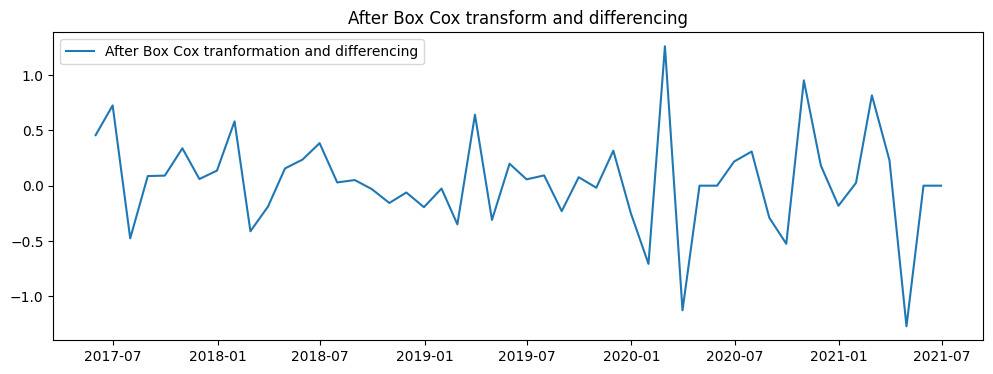

In [150]:
data_boxcox_diff = pd.Series(data_boxcox - data_boxcox.shift(), mnc_monthly.index)
plt.figure(figsize=(12,4))
plt.plot(data_boxcox_diff, label='After Box Cox tranformation and differencing')
plt.legend(loc='best')
plt.title('After Box Cox transform and differencing')
plt.show()

In [151]:
data_boxcox_diff.dropna(inplace=True)

In [152]:
train_data_boxcox = data_boxcox[:train_len] # Arima
test_data_boxcox = data_boxcox[train_len:]

train_data_boxcox_diff = data_boxcox_diff[:train_len] # Rest
test_data_boxcox_diff = data_boxcox_diff[train_len:]

# Differencing and boxcox done on the entire data, hence need to split it again

In [153]:
test_data_boxcox_diff

MncVisiteDate
2020-11-30    0.181786
2020-12-31   -0.181786
2021-01-31    0.025398
2021-02-28    0.816834
2021-03-31    0.229219
2021-04-30   -1.271862
2021-05-30    0.000000
2021-06-30    0.000000
dtype: float64

## AR

In [155]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train_data_boxcox_diff, order=(1, 0, 0)) 
model_fit = model.fit()
print(model_fit.params) # gives the intercept and coefficient values

const     0.040121
ar.L1    -0.457172
sigma2    0.145042
dtype: float64


C:\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


In [156]:
# In order to make the forecast, we need to transform the forecasts made to the original form
y_hat_ar = data_boxcox_diff.copy()
y_hat_ar['ar_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_ar['ar_forecast_boxcox'] = y_hat_ar['ar_forecast_boxcox_diff'].cumsum()
y_hat_ar['ar_forecast_boxcox'] = y_hat_ar['ar_forecast_boxcox'].add(data_boxcox[0])
y_hat_ar['ar_forecast'] = np.exp(y_hat_ar['ar_forecast_boxcox'])
# In order to get back the original time series we do a cumulative sum to remove the differencing and exponentiate the 
# forecasts in order to remove the effect of the boxcox transformation

In [157]:
# Out of sample forecast.
# Fit for testing only
#y_hat_ar = data_boxcox_diff.copy()
# y_hat_ar['ar_forecast_boxcox_diff'] = data_boxcox_diff.iloc([0: -3])
# model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())

# y_hat_ar['ar_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())


In [158]:
data_boxcox_diff.index.max() - 3

TypeError: Addition/subtraction of integers and integer-arrays with Timestamp is no longer supported.  Instead of adding/subtracting `n`, use `n * obj.freq`

In [ ]:
plot_diagnostics()

### Plot train, test and forecast

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(train['TotalVisitedPatients'], label='Train')
plt.plot(test['TotalVisitedPatients'], label='Test')
plt.plot(y_hat_ar['ar_forecast'][test.index.min():], label='Auto regression forecast')
plt.legend(loc='best')
plt.title('Auto Regression Method')
plt.show()

### Calculate MAPE

In [ ]:
mape = np.round(np.mean(np.abs(test['TotalVisitedPatients']-y_hat_ar['ar_forecast'][test.index.min():])/test['TotalVisitedPatients'])*100,2)

tempResults = pd.DataFrame({'Method':['Autoregressive (AR) method'], 'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'MAPE']]
results

## MA

In [ ]:
model = ARIMA(train_data_boxcox_diff, order=(0, 0, 1)) 
model_fit = model.fit()
print(model_fit.params)
# Default parameters are 0,0,1

# Based on ACF and PACF plots, trying P =2, D =1, Q = 2

In [ ]:
y_hat_ma = data_boxcox_diff.copy()
y_hat_ma['ma_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_ma['ma_forecast_boxcox'] = y_hat_ma['ma_forecast_boxcox_diff'].cumsum()
y_hat_ma['ma_forecast_boxcox'] = y_hat_ma['ma_forecast_boxcox'].add(data_boxcox[0])
y_hat_ma['ma_forecast'] = np.exp(y_hat_ma['ma_forecast_boxcox'])

### Plot train, test and forecast

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(mnc_monthly['TotalVisitedPatients'][:train_len], label='Train')
plt.plot(mnc_monthly['TotalVisitedPatients'][train_len:], label='Test')
plt.plot(y_hat_ma['ma_forecast'][test.index.min():], label='Moving average forecast')
plt.legend(loc='best')
plt.title('Moving Average Method')
plt.show()

### Calculate MAPE

In [ ]:
mape = np.round(np.mean(np.abs(test['TotalVisitedPatients']-y_hat_ma['ma_forecast'][test.index.min():])/test['TotalVisitedPatients'])*100,2)

tempResults = pd.DataFrame({'Method':['Moving Average (MA) method'], 'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'MAPE']]
results

## ARMA

In [ ]:
model = ARIMA(train_data_boxcox_diff, order=(1, 0, 1))
model_fit = model.fit()
print(model_fit.params)

In [ ]:
y_hat_arma = data_boxcox_diff.copy()
y_hat_arma['arma_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_arma['arma_forecast_boxcox'] = y_hat_arma['arma_forecast_boxcox_diff'].cumsum()
y_hat_arma['arma_forecast_boxcox'] = y_hat_arma['arma_forecast_boxcox'].add(data_boxcox[0])
y_hat_arma['arma_forecast'] = np.exp(y_hat_arma['arma_forecast_boxcox'])

### Plot train, test and forecast

In [ ]:
plt.figure(figsize=(12,4))
plt.plot( mnc_monthly['TotalVisitedPatients'][:train_len-1], label='Train')
plt.plot(mnc_monthly['TotalVisitedPatients'][train_len-1:], label='Test')
plt.plot(y_hat_arma['arma_forecast'][test.index.min():], label='ARMA forecast')
plt.legend(loc='best')
plt.title('ARMA Method')
plt.show()

### Calculate MAPE


In [158]:
mape = np.round(np.mean(np.abs(test['TotalVisitedPatients']-y_hat_arma['arma_forecast'][train_len-1:])/test['TotalVisitedPatients'])*100,2)

tempResults = pd.DataFrame({'Method':['Autoregressive moving average (ARMA) method'], 'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'MAPE']]
results

NameError: name 'y_hat_arma' is not defined

# ARIMA

In [159]:
model = ARIMA(train_data_boxcox, order=(1, 1, 1))
model_fit = model.fit()
print(model_fit.params)

const        0.027626
ar.L1.D.y   -0.066137
ma.L1.D.y   -0.471295
dtype: float64


/home/iiitb/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
/home/iiitb/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


In [160]:
y_hat_arima = data_boxcox_diff.copy()
y_hat_arima['arima_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_arima['arima_forecast_boxcox'] = y_hat_arima['arima_forecast_boxcox_diff'].cumsum()
y_hat_arima['arima_forecast_boxcox'] = y_hat_arima['arima_forecast_boxcox'].add(data_boxcox[0])
y_hat_arima['arima_forecast'] = np.exp(y_hat_arima['arima_forecast_boxcox'])

### Plot train, test and forecast

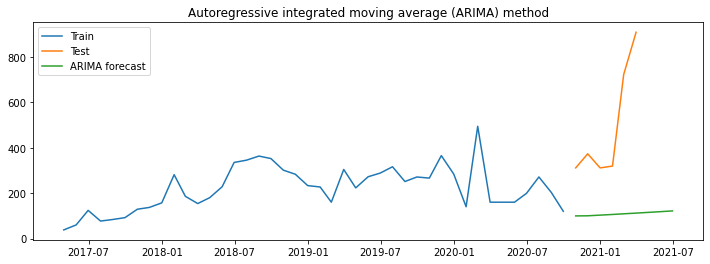

In [161]:
plt.figure(figsize=(12,4))
plt.plot(train['TotalVisitedPatients'], label='Train')
plt.plot(test['TotalVisitedPatients'], label='Test')
plt.plot(y_hat_arima['arima_forecast'][test.index.min():], label='ARIMA forecast')
plt.legend(loc='best')
plt.title('Autoregressive integrated moving average (ARIMA) method')
plt.show()

### Calculate MAPE

In [162]:
mape = np.round(np.mean(np.abs(test['TotalVisitedPatients']-y_hat_ar['ar_forecast'][test.index.min():])/test['TotalVisitedPatients'])*100,2)

tempResults = pd.DataFrame({'Method':['Autoregressive integrated moving average (ARIMA) method'],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'MAPE']]
results

,Method,MAPE
0,Naive method,70.53
0,Simple average method,45.79
0,Simple moving average forecast,51.38
0,Simple exponential smoothing forecast,49.07
0,Holt's exponential smoothing method,61.72
0,Holt Winters' additive method,56.61
0,Holt Winters' multiplicative method,71.29
0,Autoregressive integrated moving average (ARIM...,45.76


## SARIMA

In [163]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train_data_boxcox, order=(1, 1, 1), seasonal_order=(1, 1, 0, 12)) 
model_fit = model.fit()
print(model_fit.params)

ar.L1      -0.275811
ma.L1      -0.343674
ar.S.L12   -0.300146
sigma2      0.208667
dtype: float64


/home/iiitb/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
/home/iiitb/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


In [164]:
y_hat_sarima = data_boxcox_diff.copy()
y_hat_sarima['sarima_forecast_boxcox'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_sarima['sarima_forecast'] = np.exp(y_hat_sarima['sarima_forecast_boxcox'])

### Plot train, test and forecast

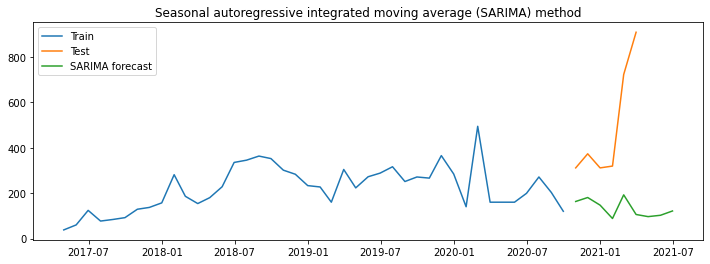

In [165]:
plt.figure(figsize=(12,4))
plt.plot(train['TotalVisitedPatients'], label='Train')
plt.plot(test['TotalVisitedPatients'], label='Test')
plt.plot(y_hat_sarima['sarima_forecast'][test.index.min():], label='SARIMA forecast')
plt.legend(loc='best')
plt.title('Seasonal autoregressive integrated moving average (SARIMA) method')
plt.show()

### Calculate MAPE

In [166]:
mape = np.round(np.mean(np.abs(test['TotalVisitedPatients']-y_hat_sarima['sarima_forecast'][test.index.min():])/test['TotalVisitedPatients'])*100,2)
actual = test['TotalVisitedPatients']
my_forecast =y_hat_sarima['sarima_forecast'][test.index.min():]
tempResults = pd.DataFrame({'Method':['Seasonal autoregressive integrated moving average (SARIMA) method'], 'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'MAPE']]
results

,Method,MAPE
0,Naive method,70.53
0,Simple average method,45.79
0,Simple moving average forecast,51.38
0,Simple exponential smoothing forecast,49.07
0,Holt's exponential smoothing method,61.72
0,Holt Winters' additive method,56.61
0,Holt Winters' multiplicative method,71.29
0,Autoregressive integrated moving average (ARIM...,45.76
0,Seasonal autoregressive integrated moving aver...,64.32


In [167]:
# Computing all performance measures

from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import pacf
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    #acf1 = acf(fc-test)[1]                      # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse,
            'corr':corr, 'minmax':minmax})

In [168]:
print(len(forecast))
print(len(actual))

6
6


In [169]:
# Ensure forecast and actual are 1-dimensional
forecast = np.ravel(my_forecast)
actual = np.ravel(actual)

# Print lengths to verify
print(f"Length of forecast: {len(forecast)}")
print(f"Length of actual: {len(actual)}")

# Truncate forecast to match the length of actual, if necessary
forecast = forecast[:len(actual)]

# Re-run your forecast_accuracy function
accuracy = forecast_accuracy(forecast, actual)
print(accuracy)

Length of forecast: 9
Length of actual: 6
{'mape': 0.6431547429429432, 'me': -344.4612457654859, 'mae': 344.4612457654859, 'mpe': -0.6431547429429432, 'rmse': 420.8964716592941, 'corr': -0.06383315794898768, 'minmax': 0.6431547429429432}


P, D, Q values can be changed through trial and error. It can be observed that SARIMA works better than other regression models. 

Out of sample forecasts

In [170]:



series=mnc_monthly[['TotalVisitedPatients']]
# print(series)
split_point = len(series) - 7
dataset, validation = series[0:split_point], series[split_point:]
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))
dataset.to_csv('dataset.csv', index=False)
validation.to_csv('validation.csv', index=False)

#print(dataset)



Dataset 44, Validation 7


In [171]:
from pandas import read_csv
from statsmodels.tsa.arima.model import ARIMA
import numpy
 
# create a differenced series
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return numpy.array(diff)

# load dataset
series = read_csv('dataset.csv', header=0)
#print(series)
X = series.values

print(X.shape)
# x_ = X.resize(len(X), 1)
# print(X[0])
# x_flatten = X.flatten
# print(x_flatten)
days_in_year = 365
differenced = difference(X, days_in_year)

# differenced

(44, 1)


In [172]:

from pandas import read_csv
from statsmodels.tsa.arima.model import ARIMA
import numpy
 
# create a differenced series
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return numpy.array(diff)
series = read_csv('dataset.csv', header=0)
X = series.values
print(X.shape)
days_in_year = 365
differenced = difference(X, days_in_year)
differenced

(44, 1)


array([], dtype=float64)

In [173]:

from pandas import read_csv
from statsmodels.tsa.arima.model import ARIMA
import numpy
 
# create a differenced series
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return numpy.array(diff)
 
# load dataset
# series = read_csv('dataset.csv', header=0)
# seasonal difference
# series = read_csv('dataset.csv', header=0)
X = mnc_monthly['TotalVisitedPatients']
days_in_year = 1
differenced = difference(X, days_in_year)
# fit model
model = ARIMA(differenced, order=(1,0,1))
model_fit = model.fit()
# print summary of fit model
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   50
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -312.166
Date:                Mon, 02 Sep 2024   AIC                            632.332
Time:                        11:10:40   BIC                            639.980
Sample:                             0   HQIC                           635.245
                                 - 50                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.9450      1.999      2.474      0.013       1.027       8.863
ar.L1          0.3871      0.134      2.880      0.004       0.124       0.651
ma.L1         -0.9994      8.352     -0.120      0.9

Notice here the coefficient of the MA2 term is close to zero and the P-Value in ‘P>|z|’ column is highly insignificant. It should ideally be less than 0.05 for the respective X to be significant.

In [174]:
# invert differenced value
def inverse_difference(history, yhat, interval=1):
    return yhat + history[-interval]
# one-step out-of sample forecast
forecast = model_fit.forecast()[0]
forecast = inverse_difference(X, forecast, days_in_year)
print('Forecast: %f' % forecast)

Forecast: 333.630311


In [175]:
# multi-step out-of-sample forecast
start_index = len(differenced)
end_index = start_index + 6
forecast = model_fit.predict(start=start_index, end=end_index)
# invert the differenced forecast to something usable
history = [x for x in X]
day = 1
for yhat in forecast:
    inverted = inverse_difference(history, yhat, days_in_year)
    print('Month %d: %f' % (day, inverted))
    history.append(inverted)
    day += 1

Month 1: 333.630311
Month 2: 367.285573
Month 3: 383.344795
Month 4: 392.592315
Month 5: 399.202918
Month 6: 404.792730
Month 7: 409.987377


In [176]:
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    acf1 = acf(fc-test)[1]                      # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'acf1':acf1, 
            'corr':corr, 'minmax':minmax})

# forecast_accuracy(fc, test.values)
forecast_accuracy

<function __main__.forecast_accuracy(forecast, actual)>